In [96]:
import numpy as np
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize) # show full ndarray

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [110]:
directory = '../Snapshots/'

# iterate over each snapshot
initialise = True
for filename in os.listdir(directory):
    snapshot = np.flip(np.load(directory+filename), axis=0) # the deep map origin is on the top
    snapshot = snapshot[:, 255] # take the middle column
    if initialise is True:
        prior = snapshot
        initialise = False
    else:
        prior = np.vstack((prior, snapshot))  

prior = prior.T
prior_mean = np.ma.masked_invalid(prior).mean(axis=1)  # ignore the inf

height = np.array(range(512))
prior_dist = np.append(height[:, None], prior_mean[:, None], axis=1)

column_values = ['Height', 'Distance']
  
# creating the dataframe
prior_dist_df = pd.DataFrame(data = prior_dist, 
                  columns = column_values)
  
prior_dist_df.to_pickle('prior_dist') 

<AxesSubplot:xlabel='Distance', ylabel='Height'>

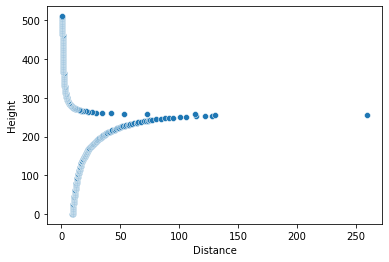

In [111]:
prior_dist_df = pd.read_pickle('prior_dist')
sns.scatterplot(data=prior_dist_df, x="Distance", y="Height")